
## Ames Housing Data and Kaggle Challenge

Part 3 - after the 02_Preprocessing_and_Feature_Engineering

This notebook ism the last part.. intended for creating regresssion models and testing.
and using the final models to predict the test dataset for submission to Kaggle

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, KFold,cross_validate

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import get_scorer

import statsmodels.api as sm


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading of train dataset with additional features

In [3]:
df_train = pd.read_csv("../datasets/train_wfeature_all.csv")
df_train.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,HouseAge
0,0,109,533352170,60,6.0,79.0,13517,2,3,2.0,...,44,0,0,0,0,0,3,2010,130500,34
1,1,544,531379050,60,6.0,43.0,11492,2,3,2.0,...,74,0,0,0,0,0,4,2009,220000,13
2,2,153,535304180,20,6.0,68.0,7922,2,4,2.0,...,52,0,0,0,0,0,1,2010,109000,57
3,3,318,916386060,60,6.0,73.0,9802,2,4,2.0,...,0,0,0,0,0,0,4,2010,174000,4
4,4,255,906425045,50,6.0,82.0,14235,2,3,2.0,...,59,0,0,0,0,0,3,2010,138500,110


In [4]:
#drop unnecessary columns
df_train.drop(columns=['Unnamed: 0', 'Id', 'PID'], inplace=True)

In [5]:
#check the number of data points and columns
df_train.shape

(1955, 70)

In [6]:
#check that there is no null values
df_train.isnull().sum()[df_train.isnull().sum()>0].sort_values()

Series([], dtype: int64)

In [7]:
df_train.dtypes

MS SubClass       int64
MS Zoning       float64
Lot Frontage    float64
Lot Area          int64
Street            int64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
SalePrice         int64
HouseAge          int64
Length: 70, dtype: object

***define X  and y***

In [8]:
X=df_train.drop(columns=['SalePrice'])
y=df_train['SalePrice']

In [9]:
#check the p-value using the OLS from statsmodel.api
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2760.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                        0.00
Time:                        23:50:37   Log-Likelihood:                         -21959.
No. Observations:                1955   AIC:                                  4.405e+04
Df Residuals:                    1889   BIC:                                  4.442e+04
Df Model:                          66                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
MS SubClass       -92.1250     13.669     -6.740      0.000    -118.933     -65.317
MS Zoning         -15.9908    687.765     -0.023      0.981   -1364.849    1332.867
Lot Frontage        2.8067     29.820      0.094      0.925     -55.676      61.290
Lot Area            0.4615      0.109      4.235      0.000       0.248       0.675
Street           4055.4108   7363.593      0.551      0.582   -1.04e+04    1.85e+04
Lot Shape        -203.0686    885.041     -0.229      0.819   -1938.829    1532.692
Land Contour     1911.5212   1067.037      1.791      0.073    -181.174    4004.216
Utilities          1.6e+04   8660.177      1.847      0.065    -987.403     3.3e+04
Lot Config        322.8136    399.545      0.808      0.419    -460.782    1106.410
Land Slope      -3109.2832   2020.367     -1.539      0.124   -7071.669     853.103
Neighborhood     1099.5704    114.779      9.580      0.000     874.463    1324.678
Condition 1      2550.7844    399.321      6.388      0.000    1767.629    3333.940
Condition 2      1230.3506   1651.991      0.745      0.457   -2009.569    4470.270
Bldg Type        -594.4687    778.087     -0.764      0.445   -2120.468     931.531
House Style      -861.4042    342.980     -2.512      0.012   -1534.064    -188.745
Overall Qual     8454.2016    602.266     14.037      0.000    7273.026    9635.377
Overall Cond     4764.6640    533.568      8.930      0.000    3718.219    5811.109
Year Built         23.4574     24.124      0.972      0.331     -23.856      70.771
Year Remod/Add     77.2963     34.365      2.249      0.025       9.899     144.694
Roof Style       2131.5108   1001.248      2.129      0.033     167.842    4095.179
Mas Vnr Area        2.9276      3.228      0.907      0.365      -3.404       9.259
Exter Qual       7659.8924   1357.596      5.642      0.000    4997.348    1.03e+04
Exter Cond      -1319.4471   1284.641     -1.027      0.305   -3838.911    1200.016
Foundation       1016.5092    487.221      2.086      0.037      60.961    1972.057
Bsmt Qual        1303.5284   1003.015      1.300      0.194    -663.605    3270.661
Bsmt Cond       -3220.3304   1189.255     -2.708      0.007   -5552.721    -887.940
Bsmt Exposure    1488.4679    361.445      4.118      0.000     779.595    2197.341
BsmtFin Type 1     14.6181    331.710      0.044      0.965    -635.938     665.174
BsmtFin SF 1       13.5616      1.664      8.148      0.000      10.297      16.826
BsmtFin Type 2   -155.2595    738.933     -0.210      0.834   -1604.471    1293.952
BsmtFin SF 2        1.2520      3.224      0.388      0.698      -5.070       7.574
Bsmt Unf SF        -1.6119      1.468     -1.098      0.272      -4.491       1.267
Total Bsmt SF      13.2017      2.006      6

***below 0.05 p-value, means they are statistically significant ...***
- MS SubClass,Lot Area,Neighborhood,Condition 1,House Style,
Overall Qual, Overall Cond, Year Remod/Add, Roof Style, Exter Qual,
Bsmt Cond,Bsmt Exposure,BsmtFin SF 1,Total Bsmt SF,Heating QC,	
Electrical,1st Flr SF,nd Flr SF,2nd Flr SF,Bsmt Full Bath,Bedroom AbvGr,
Kitchen AbvGr,Kitchen Qual,Functional,Fireplace Qu,Garage Area,Open Porch SF,
Screen Porch,Yr Sold,HouseAge

In [10]:
#split the data as train and validation
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=52)

In [11]:
#scale the X
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

## with Poly

In [12]:
poly = PolynomialFeatures(
    degree = 2, include_bias = False, interaction_only = False)

In [13]:
X_train_poly = poly.fit_transform(X_train)
polynomial_column_names = poly.get_feature_names(input_features = X_train.columns)
X_train_poly = pd.DataFrame(data = X_train_poly, columns = polynomial_column_names )

In [14]:
X_val_poly = poly.fit_transform(X_val)
polynomial_column_names = poly.get_feature_names(input_features = X_val.columns)
X_val_poly = pd.DataFrame(data = X_val_poly, columns = polynomial_column_names )

In [15]:
#scale the X - Poly
ssp = StandardScaler()
X_train_scaled_poly = ssp.fit_transform(X_train_poly)
X_val_scaled_poly = ssp.transform(X_val_poly)

## Linear Regression (without Poly)

In [16]:
# Instantiate model.
lr = LinearRegression()

# Fit model
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
#R2 on the train set
lr_train_score = lr.score(X_train_scaled, y_train)

#R2 on the test set
lr_val_score = lr.score(X_val_scaled, y_val)

#predict train and validation
y_pred_train = lr.predict(X_train_scaled)
y_pred_val = lr.predict(X_val_scaled)

#mean square error for train
mse_train = metrics.mean_squared_error(y_pred_train, y_train)

#mean square error for val
mse_val = metrics.mean_squared_error(y_pred_val, y_val)

print('R2 of Train:', lr_train_score, 'R2 of Validation:', lr_val_score)
print('MSE of Train,', mse_train, 'MSE of Validation', mse_val)

R2 of Train: 0.904707538219881 R2 of Validation: 0.9055518635922923
MSE of Train, 337552425.5488553 MSE of Validation 351421340.68517095


In [18]:
coef = dict(zip(X_train.columns, lr.coef_))
#coef

## Linear Regression (with Poly)

In [19]:
# Instantiate model.
lrPoly = LinearRegression()

# Fit model
lrPoly.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [20]:
#R2 on the train set
lr_train_score_poly = lrPoly.score(X_train_scaled_poly, y_train)

#R2 on the test set
lr_val_score_poly = lrPoly.score(X_val_scaled_poly, y_val)

#predict train and validation
y_pred_train_poly = lrPoly.predict(X_train_scaled_poly)
y_pred_val_poly = lrPoly.predict(X_val_scaled_poly)

#mean square error for train
mse_train_poly = metrics.mean_squared_error(y_pred_train_poly, y_train)

#mean square error for val
mse_val_poly = metrics.mean_squared_error(y_pred_val_poly, y_val)

print('R2 of Train:', lr_train_score_poly, 'R2 of Validation:', lr_val_score_poly)
print('MSE of Train,', mse_train_poly, 'MSE of Validation', mse_val_poly)

R2 of Train: 1.0 R2 of Validation: -16.19139032605054
MSE of Train, 9.749240662951807e-17 MSE of Validation 63965491182.83858


In [21]:
coef = dict(zip(X_train.columns, lrPoly.coef_))
#coef

# RIDGE, LASSO and ELASTiCNET

In [22]:
def rmodel_search(model_type, alphas, X_train, y_train, X_val, y_val):
    ''' this function is to manually search the best alpha
    parameter: model_type ('Ridge' or 'Lasso' or 'Enet'), list of alpha,
    X_train, y_train, X_val, y_val
    
    return: optimal alpha based on the range of alphas, highest r2 score  in validation 
    and the highest score in the cross validation
    '''
    crossval = KFold(n_splits=5, shuffle=True, random_state=52)
    scorer = get_scorer('r2')
    
    val_score_list = []    #this is out X_val and y_val
    train_score_list = []  #this is our X_train and y_train
    cv_score_list = []     #this is our Cross validation from (X_train)

    
    #loop for each alpha
    for alpha in alphas:
        
        #print("Trying for alpha:",alpha )
        
        if model_type == 'Lasso':
            rmodel = Lasso(alpha = alpha)
        elif model_type == 'Ridge':
            rmodel = Ridge(alpha = alpha)
        elif model_type == 'Enet':
            rmodel = ElasticNet(alpha = alpha)
        else:
            print('Invalid Model Type, Lasso, Ridge')
            return None

        cv = cross_validate(
            rmodel, X_train, y_train, scoring=scorer, cv=crossval, 
            return_train_score = True)
        
        train_score_list.append(np.mean(cv['train_score']))
        cv_score_list.append(np.mean(cv['test_score']))
            
        #fit  Train
        rmodel.fit(X_train,y_train)
        
        #predict Val
        y_pred = rmodel.predict(X_val)
        val_score_list.append(scorer(rmodel, X_val, y_val))
    

    #after looping, search the optimal alpha
    optimal_alpha_index = np.argmax(val_score_list)
    optimal_alpha = alphas[optimal_alpha_index]
    
    #maximum score in our validation data
    val_score = np.max(val_score_list)
    
    #train score using the same alpha
    train_score = train_score_list[optimal_alpha_index]
    
    #print(cv_score_list, train_score_list, val_score_list)
    #print(optimal_alpha_index, optimal_alpha)
    
    #lets plot the results
    rmodel_plot(
            cv_score_list, train_score_list, val_score_list,alphas, optimal_alpha,
        model_type)
    
    return optimal_alpha, val_score, train_score

In [23]:
def rmodel_plot(cross_val_score, train_score_list, val_score_list, alphas, optimal_alpha,
    model_type):
    
    '''plotting the optimal alpha and the r2 score of cross validation, train data, and validation data
    parameters: cross_val_score, train_score_list, alphas, optimal_alpha,
                model_type, val_score_list
    return: no return, just plot the graph
    '''
    
    #set figure size
    plt.figure(figsize = (7,5))
    
    #cross validation score
    sns.lineplot(y = cross_val_score, x = alphas, 
                 label = 'Cross - validation_data')
    
    #training data score
    sns.lineplot(y = train_score_list, x = alphas, 
                 label = 'Training Data (X_train)')
    
    #vertical line for the optimal alpha
    plt.axvline(x=optimal_alpha, linestyle='--')
    
    
    #
    sns.lineplot(y = val_score_list, x = alphas, 
                     label = 'Validation Data (X_val)')
    
    plt.title(model_type)
    plt.xlabel('alphas')
    plt.ylabel('r2 (score)')
    
    plt.legend()
    plt.show()

In [24]:
#we will use the same alphas for different regression models
my_alphas = np.linspace(100, 800, 100)

## Ridge

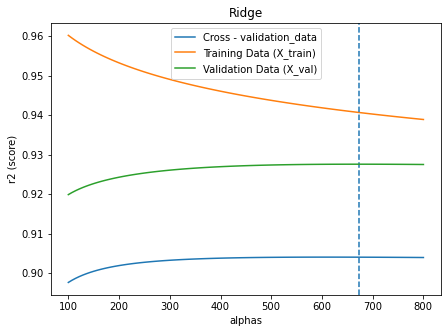

Alpha: 672.7272727272727
Train r2: 0.940689162026251 Val r2: 0.9275841950033505


In [25]:
#using user defined function that loop and plot the optimal alpha

ridgesearch_optimal_alpha, ridgesearch_val_score, ridgesearch_train_score = \
rmodel_search('Ridge', my_alphas, X_train_scaled_poly, y_train, 
        X_val_scaled_poly, y_val)

print('Alpha:', ridgesearch_optimal_alpha)
print('Train r2:', ridgesearch_train_score, 'Val r2:', ridgesearch_val_score)

In [26]:
#Using RidgeCV using the same alphas
ridge_cv = RidgeCV(alphas=my_alphas)
ridge_cv.fit(X_train_scaled_poly, y_train);
ridge_cv_alpha = ridge_cv.alpha_

#instantiate the model based on the alpha above
ridger = Ridge(ridge_cv_alpha)
ridger.fit(X_train_scaled_poly, y_train);
ridger.fit(X_train_scaled_poly, y_train)


#R2 of  Train
ridger_train_score = ridger.score(X_train_scaled_poly, y_train)
#R2 of Val
ridger_val_score = ridger.score(X_val_scaled_poly, y_val)


print('Alpha:', ridge_cv_alpha)
print('Train r2:', ridger_train_score, 'Val r2:', ridger_val_score)

Alpha: 566.6666666666667
Train r2: 0.9411282895280398 Val r2: 0.9275179112647332


In [27]:
#Using RandomizedSearchCV, search for the best alpa

param_grid = {'alpha': my_alphas}

ridge_model = Ridge()
rand_search_ridge = RandomizedSearchCV(estimator=ridge_model, 
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search_ridge.fit(X_train_scaled_poly, y_train);

#check the optimal alpha based on RandomizedSearchCV
ridgerandomscv_optimal_alpa = rand_search_ridge.best_estimator_.alpha


# Instantiate model.
ridgerandomscv = Ridge(alpha=ridgerandomscv_optimal_alpa)

# Fit model using optimal alpha.
ridgerandomscv.fit(X_train_scaled_poly, y_train)

#R2 of  Train
ridgerandomscv_train_score = ridgerandomscv.score(X_train_scaled_poly, y_train)
#R2 of Val
ridgerandomscv_val_score = ridgerandomscv.score(X_val_scaled_poly, y_val)


print('Alpha:', ridgerandomscv_optimal_alpa)
print('Train r2:', ridgerandomscv_train_score, 'Val r2:', ridgerandomscv_val_score)


Alpha: 665.6565656565657
Train r2: 0.9395631049108771 Val r2: 0.9275841795872652


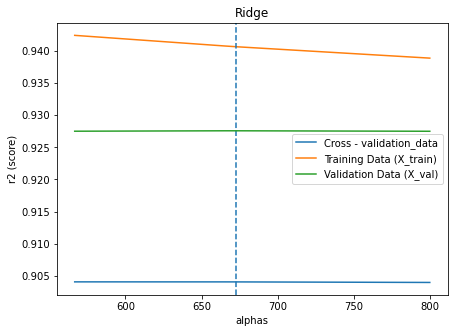

In [28]:
#Plot the data using the best alpha from different approach


my_alphas = [ridgesearch_optimal_alpha, ridge_cv_alpha, ridgerandomscv_optimal_alpa,800]

ridgefinal_optimal_alpha, ridgefinal_val_score, ridgefinal_train_score = \
rmodel_search('Ridge', my_alphas, X_train_scaled_poly, y_train, 
        X_val_scaled_poly, y_val)



In [58]:
print(ridgefinal_optimal_alpha, ridgefinal_val_score, ridgefinal_train_score )

672.7272727272727 0.9275841950033505 0.940689162026251


## LASSO

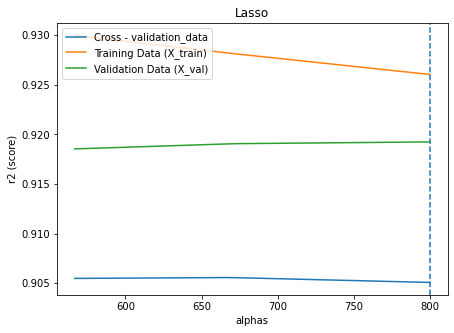

800 0.919240216461713 0.926043537186582


In [29]:
#using user defined function that search and plot the best alpha
lassosearch_optimal_alpha, lassosearch_val_score, lassosearch_train_score = \
rmodel_search('Lasso', my_alphas, X_train_scaled_poly, y_train, 
        X_val_scaled_poly, y_val)

print(lassosearch_optimal_alpha, lassosearch_val_score, lassosearch_train_score)

In [30]:
#Using LassoCV using the same alphas
lasso_cv = LassoCV(alphas=my_alphas)
lasso_cv.fit(X_train_scaled_poly, y_train);
lasso_cv_alpha = ridge_cv.alpha_

#instantiate the model based on the alpha above
lassor = Lasso(lasso_cv_alpha)
lassor.fit(X_train_scaled_poly, y_train);
lassor.fit(X_train_scaled_poly, y_train)


#R2 of  Train
lassor_train_score = lassor.score(X_train_scaled_poly, y_train)
#R2 of Val
lassor_val_score = lassor.score(X_val_scaled_poly, y_val)


print('Alpha:', lasso_cv_alpha)
print('Train r2:', lassor_train_score, 'Val r2:', lassor_val_score)

Alpha: 566.6666666666667
Train r2: 0.9269131874180851 Val r2: 0.9185347773460675


In [33]:
#do we have any features that zeroed out?
#coef = dict(zip(X_train.columns, lassor.coef_))
#coef

In [31]:
#Using RandomizedSearchCV, search for the best alpa
param_grid = {'alpha': my_alphas}

model = Lasso()
lasso_rand_search = RandomizedSearchCV(estimator=model, 
                                 param_distributions=param_grid,
                                 n_iter=100)

lasso_rand_search.fit(X_train_scaled_poly, y_train);

#check the optimal alpha based on RandomizedSearchCV
lassorandomcsv_optimal_alpha = lasso_rand_search.best_estimator_.alpha

# Instantiate model.
lassorandomcsv = Lasso(alpha=lassorandomcsv_optimal_alpha)

# Fit model using optimal alpha.
lassorandomcsv.fit(X_train_scaled_poly, y_train)

#R2 of  Train
lassorandomcsv_train_score = lassorandomcsv.score(X_train_scaled_poly, y_train)
# Evaluate model.
lassorandomcsv_val_score = lassorandomcsv.score(X_val_scaled_poly, y_val)

print('Alpha:', lassorandomcsv_optimal_alpha)
print('Train r2:', lassorandomcsv_train_score, 'Val r2:', lassorandomcsv_val_score)

Alpha: 566.6666666666667
Train r2: 0.9269131874180851 Val r2: 0.9185347773460675


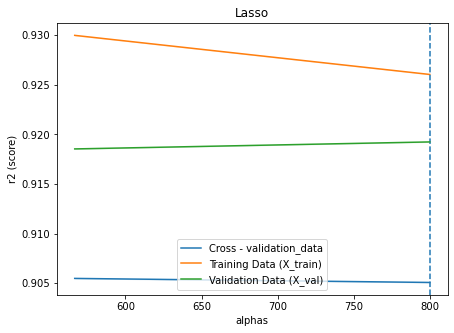

In [34]:
#Plot the data using the best alpha from different approach

my_alphas = [lassosearch_optimal_alpha, lasso_cv_alpha, lassorandomcsv_optimal_alpha,800]

lassofinal_optimal_alpha, lassofinal_val_score, lassofinal_train_score = \
rmodel_search('Lasso', my_alphas, X_train_scaled_poly, y_train, 
        X_val_scaled_poly, y_val)

In [59]:
print(lassofinal_optimal_alpha, lassofinal_val_score, lassofinal_train_score)

800 0.919240216461713 0.926043537186582


## ElasticNet

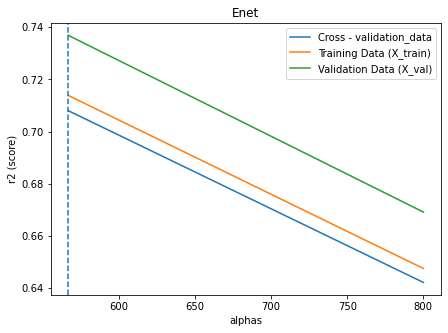

566.6666666666667 0.7368933249943628 0.7138552605065197


In [35]:
#using user defined function that search and plot the best alpha
enetsearch_optimal_alpha, enetsearch_val_score, enetsearch_train_score = \
rmodel_search('Enet', my_alphas, X_train_scaled_poly, y_train, 
        X_val_scaled_poly, y_val)

print(enetsearch_optimal_alpha, enetsearch_val_score, enetsearch_train_score)

In [36]:
#using ElasticNetCV

# Instantiate model.
enetcv_model = ElasticNetCV(alphas=my_alphas)

# Fit model 
enetcv_model.fit(X_train_scaled_poly, y_train)
enetcv_alpha = enetcv_model.alpha_

# Instantiate model using hte optimal aplha found by ElasticNetCV
enetr = ElasticNet(alpha=enetcv_alpha)

# Fit model using optimal alpha.
enetr.fit(X_train_scaled_poly, y_train)

# Evaluate model.
enetr_train_score  = enetr.score(X_train_scaled_poly, y_train)
enetr_test_score = enetr.score(X_val_scaled_poly, y_val)

print('Alpha:', enetcv_alpha)
print('Train r2:', enetr_train_score, 'Val r2:', enetr_test_score)

Alpha: 566.6666666666667
Train r2: 0.7133952824083487 Val r2: 0.7368933249943628


In [37]:
#Using RandomizedSearchCV, search for the best alpa
param_grid = {'alpha': my_alphas}

model = ElasticNet()
enet_rand_search = RandomizedSearchCV(estimator=model, 
                                 param_distributions=param_grid,
                                 n_iter=100)

enet_rand_search.fit(X_train_scaled_poly, y_train);

#check the optimal alpha based on RandomizedSearchCV
enetrandomcsv_optimal_alpha = enet_rand_search.best_estimator_.alpha

# Instantiate model.
enetrandomcsv = ElasticNet(alpha=enetrandomcsv_optimal_alpha)

# Fit model using optimal alpha.
enetrandomcsv.fit(X_train_scaled_poly, y_train)

#R2 of  Train
enetrandomcsv_train_score = enetrandomcsv.score(X_train_scaled_poly, y_train)
# Evaluate model.
enetrandomcsv_val_score = enetrandomcsv.score(X_val_scaled_poly, y_val)

print('Alpha:', enetrandomcsv_optimal_alpha)
print('Train r2:', enetrandomcsv_train_score, 'Val r2:', enetrandomcsv_val_score)

Alpha: 566.6666666666667
Train r2: 0.7133952824083487 Val r2: 0.7368933249943628


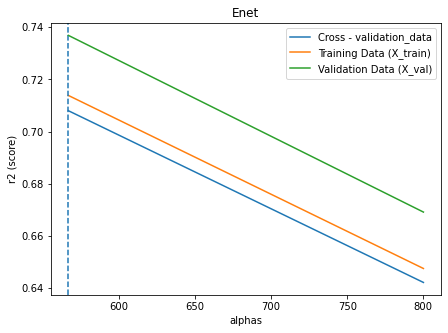

In [41]:
#Plot the data using the best alpha from different approach

my_alphas = [enetsearch_optimal_alpha, enetcv_alpha, enetrandomcsv_optimal_alpha,800]

enetfinal_optimal_alpha, enetfinal_val_score, enetfinal_train_score = \
rmodel_search('Enet', my_alphas, X_train_scaled_poly, y_train, 
        X_val_scaled_poly, y_val)

In [60]:
print(enetfinal_optimal_alpha, enetfinal_val_score, enetfinal_train_score)

566.6666666666667 0.7368933249943628 0.7138552605065197


# Summmary

In [56]:
regression_dict = {    
    "LR" : {'alpha': 0, 'train_score':lr_train_score, 'validation_score' : lr_val_score} ,
   # "LR with Poly" : {'alpha': 0, 'train_score':lr_train_score_poly, 'validation_score' : lr_val_score_poly} ,
    "Ridge" : {'alpha':ridgefinal_optimal_alpha, 'train_score':ridgefinal_train_score, 'validation_score' : ridgefinal_val_score},
    "Lasso" : {'alpha': lassofinal_optimal_alpha, 'train_score':lassofinal_train_score, 'validation_score' : lassofinal_val_score},
    "ElasticNet" : {'alpha': enetfinal_optimal_alpha, 'train_score':enetfinal_val_score, 'validation_score' : enetfinal_train_score},
}

df_reg = pd.DataFrame(regression_dict).T.reset_index()
df_reg.rename(columns={"index":"model_type"}, inplace=True)
df_reg

,model_type,alpha,train_score,validation_score
0,LR,0.000000,0.904708,0.905552
1,Ridge,672.727273,0.940689,0.927584
2,Lasso,800.000000,0.926044,0.919240
3,ElasticNet,566.666667,0.736893,0.713855


<AxesSubplot:xlabel='model_type', ylabel='validation_score'>

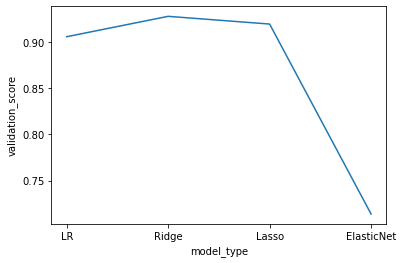

In [57]:
sns.lineplot(data=df_reg, x='model_type', y='validation_score')

## PREDICT Test Dataset

In [61]:
df_test = pd.read_csv("../datasets/test_wfeature_all.csv")

In [62]:
df_test.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,HouseAge
0,0,2658,902301120,190,4.0,69.0,9142,2,4,2.0,...,0,60,112,0,0,0,0,4,2006,96
1,1,2718,905108090,90,6.0,69.0,9662,2,3,2.0,...,170,0,0,0,0,0,0,8,2006,29
2,2,2414,528218130,60,6.0,58.0,17104,2,3,2.0,...,100,24,0,0,0,0,0,9,2006,0
3,3,1989,902207150,30,4.0,60.0,8520,2,4,2.0,...,0,0,184,0,0,0,0,7,2007,84
4,4,625,535105100,20,6.0,68.0,9500,2,3,2.0,...,0,76,0,0,185,0,0,7,2009,46


In [63]:
df_test.drop(columns=['Unnamed: 0'], inplace=True)

In [64]:
df_test.shape

(878, 71)

In [65]:
#check for NUll values
df_test.isnull().sum()[df_test.isnull().sum()>0].sort_values()

Series([], dtype: int64)

In [66]:
## Define X 
X_test = df_test.drop(columns=['Id', 'PID'])
X_test_scaled = ss.transform(X_test)

In [67]:
## Poly
X_test_poly = poly.fit_transform(X_test)
polynomial_column_names = poly.get_feature_names(input_features = X_test.columns)
X_test_poly = pd.DataFrame(data = X_test_poly, columns = polynomial_column_names )

In [68]:
# scale the X
X_test_poly_scaled = ssp.transform(X_test_poly)

### LR - PREDICT

In [70]:
df_test_lr = df_test.copy()

In [71]:
df_test_lr['SalePrice'] = lr.predict(X_test_scaled)

In [72]:
df_test_submit = df_test_lr[['Id','SalePrice']]

<AxesSubplot:>

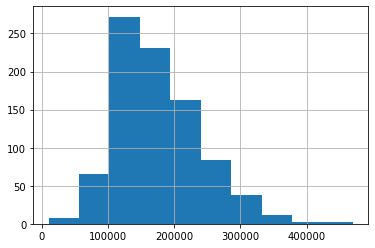

In [73]:
df_test_submit["SalePrice"].hist()

In [74]:
df_test_submit["SalePrice"].head()

0    150065.354871
1    150674.354871
2    208505.354871
3    113280.354871
4    177885.854871
Name: SalePrice, dtype: float64

In [75]:
df_test_submit.to_csv("../datasets/submit_lreg.csv", index=False)

### RIDGE - PREDICT

In [77]:
df_test_ridge = df_test.copy()

In [78]:
df_test_ridge['SalePrice'] = ridger.predict(X_test_poly_scaled)

In [79]:
df_test_submit = df_test_ridge[['Id','SalePrice']]

<AxesSubplot:>

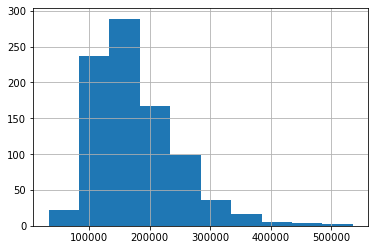

In [80]:
df_test_submit["SalePrice"].hist()

In [81]:
df_test_submit.to_csv("../datasets/submit_ridgereg.csv", index=False)

### LASSO - PREDICT

In [82]:
df_test_lasso = df_test.copy()

In [83]:
df_test_lasso['SalePrice'] = lassor.predict(X_test_poly_scaled)

In [84]:
df_test_submit = df_test_lasso[['Id','SalePrice']]

<AxesSubplot:>

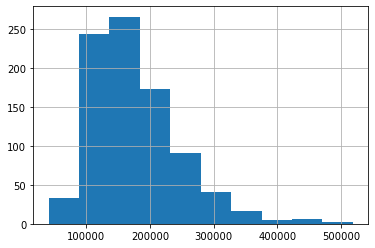

In [85]:
df_test_submit["SalePrice"].hist()

In [86]:
df_test_submit.to_csv("../datasets/submit_lassoreg.csv", index=False)

### ElasticNet - PREDICT

In [88]:
df_test_enet = df_test.copy()

In [89]:
df_test_enet['SalePrice'] = enetr.predict(X_test_poly_scaled)

In [90]:
df_test_submit = df_test_enet[['Id','SalePrice']]

<AxesSubplot:>

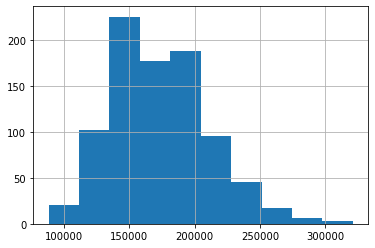

In [91]:
df_test_submit["SalePrice"].hist()

In [92]:
df_test_submit.to_csv("../datasets/submit_enetreg.csv", index=False)